In [99]:
import polars as pl
import numpy as np
from datetime import datetime

# Declarando

In [100]:
num_filas = 5_000
rng = np.random.default_rng(seed=7)

datos_edificios = {
    "metraje" : rng.exponential(scale = 300, size=num_filas),
    "año": rng.integers(low=1980, high=2024, size= num_filas),
    "tipo": rng.choice(["A", "B", "C"], size = num_filas)
}

edificios = pl.DataFrame(data=datos_edificios)
edificios

metraje,año,tipo
f64,i64,str
212.258777,1982,"""C"""
307.561004,2019,"""C"""
170.564597,2007,"""A"""
268.532959,1988,"""A"""
61.959826,2006,"""A"""
…,…,…
213.130726,1993,"""C"""
122.661835,2003,"""C"""
17.268618,2018,"""C"""


Existen métodos para explorar datos, que muchos son similares a ```pandas```. Los tipos de datos son de ```pyarrow```.

In [101]:
edificios.schema

Schema([('metraje', Float64), ('año', Int64), ('tipo', String)])

In [102]:
edificios.head()

metraje,año,tipo
f64,i64,str
212.258777,1982,"""C"""
307.561004,2019,"""C"""
170.564597,2007,"""A"""
268.532959,1988,"""A"""
61.959826,2006,"""A"""


In [103]:
edificios.describe()

statistic,metraje,año,tipo
str,f64,f64,str
"""count""",5000.0,5000.0,"""5000"""
"""null_count""",0.0,0.0,"""0"""
"""mean""",298.228337,2001.5494,null
"""std""",304.992471,12.676312,null
"""min""",0.339977,1980.0,"""A"""
"""25%""",86.042265,1990.0,null
"""50%""",200.822089,2002.0,null
"""75%""",402.872935,2012.0,null
"""max""",2792.338175,2023.0,"""C"""


# Contexto y expresiones
Expresiones son las transformaciones que se hacen en las columnas de datos, incluyendo operaciones matemáticas, agregaciones, comparaciones, manipulación de texto, etc

Un contexto se refiere al ambiente específico en que una expresión es evaluada. Existen 3 contextos principales:
* **Selección**: Seleccionar columnas de un dataframe.
* **Filtro**: Reducir al dataframe extrayendo filas que cumplan una condición.
* **Agrupación**: Hacer resúmenes de subgrupos de los datos.

In [104]:
edificios.select("metraje")

metraje
f64
212.258777
307.561004
170.564597
268.532959
61.959826
…
213.130726
122.661835
17.268618


In [105]:
edificios.select(pl.col("metraje"))

metraje
f64
212.258777
307.561004
170.564597
268.532959
61.959826
…
213.130726
122.661835
17.268618


La segunda forma usando ```pl.col``` te permite encadenar manipulaciones en la columna, por ejemplo dividir el metraje por 100

In [106]:
edificios.select(pl.col("metraje").sort() / 100)

metraje
f64
0.0034
0.003456
0.004287
0.004316
0.004514
…
20.79575
21.742617
22.888708


Podemos también filtrar

In [107]:
edificios.filter(pl.col("año") > 2015)

metraje,año,tipo
f64,i64,str
307.561004,2019,"""C"""
1015.091205,2016,"""B"""
172.599827,2022,"""A"""
220.757182,2020,"""A"""
75.103604,2016,"""C"""
…,…,…
95.661883,2019,"""B"""
516.747999,2016,"""C"""
740.445452,2023,"""B"""


In [108]:
edificios.filter(pl.col("año") > 2015).select(pl.col("año").min())

año
i64
2016


Puedo hacer agrupaciones o ```group_by```

In [109]:
(edificios.group_by("tipo")
 .agg([
     pl.mean("metraje").round(1).alias("mts promedio"),
     pl.median("año").round(1).alias("año medio"),
     pl.len()
 ])
)

tipo,mts promedio,año medio,len
str,f64,f64,u32
"""C""",300.0,2002.0,1692
"""A""",296.9,2003.0,1653
"""B""",297.8,2002.0,1655


# Lazy API
Permite hacer operaciones sin correrlas inmediatamente, eso permite optimizarlas antes de ejecución y ver potenciales errores. Además permite hacer consultas en dataframes que no caben dentro de la memoria de manera más eficiente.

```LazyFrame``` es el objeto que se usa y existen diferentes formas de crearlos

In [110]:
# creamos variable precio
datos_edificios["precio"] = rng.exponential(scale=100_000_000, size = num_filas)

edificios_lazy = pl.LazyFrame(datos_edificios)
edificios_lazy

In [111]:
lazy_query = (
    edificios_lazy
    .with_columns(
        (pl.col("precio") / pl.col("metraje")).alias("precio_m2")
    )
    .filter(pl.col("precio_m2") > 100_000)
    .filter(pl.col("año") < 2010)
)
lazy_query

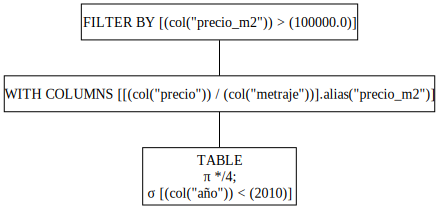

In [112]:
lazy_query.show_graph()

Esto explica que hace internamente ```polars``` para hacer la consulta.

Para ejecutarla se usa ```collect()```

In [113]:
(lazy_query.collect())

metraje,año,tipo,precio,precio_m2
f64,i64,str,f64,f64
212.258777,1982,"""C""",2.2064e7,103950.853854
170.564597,2007,"""A""",2.9574e7,173387.199516
61.959826,2006,"""A""",2.3924e8,3.8612e6
2.926088,1999,"""A""",2.0970e8,7.1666e7
842.764729,1994,"""B""",9.0218e7,107050.139414
…,…,…,…,…
27.066478,1998,"""B""",1.1429e8,4.2225e6
279.834009,1991,"""A""",1.1977e8,428018.490627
213.130726,1993,"""C""",3.7365e7,175316.233029


In [114]:
(lazy_query
 .collect()
 .select(pl.col(["precio_m2", "año"]))
)

precio_m2,año
f64,i64
103950.853854,1982
173387.199516,2007
3.8612e6,2006
7.1666e7,1999
107050.139414,1994
…,…
4.2225e6,1998
428018.490627,1991
175316.233029,1993


In [115]:
(lazy_query
 .collect()
 .select(pl.col(["precio_m2", "año"]))
 .describe()
)

statistic,precio_m2,año
str,f64,f64
"""count""",2678.0,2678.0
"""null_count""",0.0,0.0
"""mean""",3.4124e6,1994.714712
"""std""",2.4323e7,8.796034
"""min""",100027.263081,1980.0
"""25%""",241045.156977,1987.0
"""50%""",543350.608691,1995.0
"""75%""",1.4526e6,2003.0
"""max""",8.1156e8,2009.0


## Datos externos lazy
Tradicionalmente se leen todos los datos del csv o fuente externa antes de hacer cualquier procesamiento, pero con el formato lazy se minimiza lo que se lee y se procesa sólo cuando es necesario.

Ejemplo con datos de autos eléctricos yankis

In [116]:
# Bajando datos
import requests, pathlib

def bajar_archivo(file_url: str, local_file_path: pathlib.Path) -> None:
    response = requests.get(file_url)
    if response: 
        local_file_path.write_bytes(response.content)
        print (f"Archivo bajado en {local_file_path}")
    else:
        raise requests.exceptions.RequestException(f"Fallo en la descarga, código HTTP: {response.status_code}")

In [117]:
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
nombre_archivo = "electric_cars.csv"
local_file_path = pathlib.Path(nombre_archivo)
if not local_file_path.exists():
    bajar_archivo(url, local_file_path)
else:
    print (f"Archivo {nombre_archivo} ya existe")

Archivo electric_cars.csv ya existe


In [118]:
lazy_car_data = pl.scan_csv(local_file_path)
lazy_car_data

In [119]:
lazy_car_data.schema

/var/folders/tx/knx9c43n5fd4_nn752k9dxs00000gn/T/ipykernel_3727/3946365031.py:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  lazy_car_data.schema


Schema([('VIN (1-10)', String),
        ('County', String),
        ('City', String),
        ('State', String),
        ('Postal Code', Int64),
        ('Model Year', Int64),
        ('Make', String),
        ('Model', String),
        ('Electric Vehicle Type', String),
        ('Clean Alternative Fuel Vehicle (CAFV) Eligibility', String),
        ('Electric Range', Int64),
        ('Base MSRP', Int64),
        ('Legislative District', Int64),
        ('DOL Vehicle ID', Int64),
        ('Vehicle Location', String),
        ('Electric Utility', String),
        ('2020 Census Tract', Int64)])

In [120]:
lazy_car_query = (
    lazy_car_data
    .filter((pl.col("Model Year") >= 2018))
    .filter(
        pl.col("Electric Vehicle Type") == "Battery Electric Vehicle (BEV)"
    )
    .group_by(["State", "Make"])
    .agg(
        pl.mean("Electric Range").alias("Average Electric Range"),
        pl.min("Model Year").alias("Oldest Model Year"),
        pl.len().alias("Number of Cars"),
    )
    .filter(pl.col("Average Electric Range") > 100)
    .filter(pl.col("Number of Cars") > 5)
    .sort(pl.col("Number of Cars"), descending=True)
)

lazy_car_query.collect()

State,Make,Average Electric Range,Oldest Model Year,Number of Cars
str,str,f64,i64,u32
"""WA""","""JAGUAR""",204.504202,2019,238
"""TX""","""TESLA""",113.923077,2018,13
"""FL""","""TESLA""",104.428571,2019,7


No se hace ningún cálculo pesado hasta que llamamos a ```collect()```

# Integraciones
## Fuentes de datos

In [121]:
import polars as pl

data = pl.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [6, 7, 8, 9, 10],
})

data.write_csv("data.csv")
data.write_ndjson("data.json")
data.write_parquet("data.parquet")

In [122]:
data_csv = pl.read_csv("data.csv")
data_csv_lazy = pl.scan_csv("data.csv")
data_csv_lazy.schema


/var/folders/tx/knx9c43n5fd4_nn752k9dxs00000gn/T/ipykernel_3727/2993282625.py:3: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  data_csv_lazy.schema


Schema([('A', Int64), ('B', Int64)])

In [123]:
data_json = pl.read_ndjson("data.json")
data_json_lazy = pl.scan_ndjson("data.json")
data_json_lazy.schema

/var/folders/tx/knx9c43n5fd4_nn752k9dxs00000gn/T/ipykernel_3727/32618361.py:3: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  data_json_lazy.schema


Schema([('A', Int64), ('B', Int64)])

In [124]:
data_parquet = pl.read_parquet("data.parquet")
data_parquet_lazy = pl.scan_parquet("data.parquet")
data_parquet_lazy.schema


/var/folders/tx/knx9c43n5fd4_nn752k9dxs00000gn/T/ipykernel_3727/1889960607.py:3: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  data_parquet_lazy.schema


Schema([('A', Int64), ('B', Int64)])

## Objetos python

In [125]:
import numpy as np
import pandas as pd
import polars as pl

polars_data = pl.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [6, 7, 8, 9, 10]
})

pandas_data = pd.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [6, 7, 8, 9, 10]
})

numpy_data = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10]
]).T

In [126]:
pl.from_pandas(pandas_data)

A,B
i64,i64
1,6
2,7
3,8
4,9
5,10


In [127]:
pl.from_numpy(numpy_data)

column_0,column_1
i64,i64
1,6
2,7
3,8
4,9
5,10


In [128]:
pl.from_numpy(numpy_data, schema={"A": pl.Int16, "B": pl.Int16})

A,B
i16,i16
1,6
2,7
3,8
4,9
5,10


In [129]:
polars_data.to_pandas()

,A,B
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


In [130]:
polars_data.to_numpy()

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

# Joins
## Inner
Produce un DataFrame que contiene solo las filas donde la clave de unión existe en ambos DataFrames.

In [131]:
df_customers = pl.DataFrame(
    {
        "customer_id": [1, 2, 3],
        "name": ["Alice", "Bob", "Charlie"],
    }
)
print(df_customers)

shape: (3, 2)
┌─────────────┬─────────┐
│ customer_id ┆ name    │
│ ---         ┆ ---     │
│ i64         ┆ str     │
╞═════════════╪═════════╡
│ 1           ┆ Alice   │
│ 2           ┆ Bob     │
│ 3           ┆ Charlie │
└─────────────┴─────────┘


In [132]:
df_orders = pl.DataFrame(
    {
        "order_id": ["a", "b", "c"],
        "customer_id": [1, 2, 2],
        "amount": [100, 200, 300],
    }
)
print(df_orders)

shape: (3, 3)
┌──────────┬─────────────┬────────┐
│ order_id ┆ customer_id ┆ amount │
│ ---      ┆ ---         ┆ ---    │
│ str      ┆ i64         ┆ i64    │
╞══════════╪═════════════╪════════╡
│ a        ┆ 1           ┆ 100    │
│ b        ┆ 2           ┆ 200    │
│ c        ┆ 2           ┆ 300    │
└──────────┴─────────────┴────────┘


In [133]:
df_customers.join(df_orders, on="customer_id", how="inner")

customer_id,name,order_id,amount
i64,str,str,i64
1,"""Alice""","""a""",100
2,"""Bob""","""b""",200
2,"""Bob""","""c""",300


## Left (outer) join
Produce un DataFrame que contiene todas las filas del DataFrame de la izquierda y solo las filas del DataFrame de la derecha donde la clave de unión existe en el DataFrame de la izquierda. Si tomamos el ejemplo anterior y queremos obtener un DataFrame con todos los clientes y sus pedidos asociados (independientemente de si han realizado un pedido o no), podemos hacer una unión izquierda:

In [134]:
df_customers.join(df_orders, on="customer_id", how="left")

customer_id,name,order_id,amount
i64,str,str,i64
1,"""Alice""","""a""",100
2,"""Bob""","""b""",200
2,"""Bob""","""c""",300
3,"""Charlie""",null,null


## Right (outer) join

In [135]:
df_orders.join(df_customers, on="customer_id", how="right")

order_id,amount,customer_id,name
str,i64,i64,str
"""a""",100,1,"""Alice"""
"""b""",200,2,"""Bob"""
"""c""",300,2,"""Bob"""
null,null,3,"""Charlie"""


## Outer join
Produce un DataFrame que contiene todas las filas de ambos DataFrames. Las columnas son nulas si la clave de unión no existe en el DataFrame de origen. Realizar una unión externa completa en los dos DataFrames anteriores produce un DataFrame similar a la unión izquierda:

In [136]:
df_customers.join(df_orders, on="customer_id", how="full")

customer_id,name,order_id,customer_id_right,amount
i64,str,str,i64,i64
1,"""Alice""","""a""",1,100
2,"""Bob""","""b""",2,200
2,"""Bob""","""c""",2,300
3,"""Charlie""",null,null,null


In [137]:
df_customers.join(
    df_orders, on="customer_id", how="full", coalesce=True
)

customer_id,name,order_id,amount
i64,str,str,i64
1,"""Alice""","""a""",100
2,"""Bob""","""b""",200
2,"""Bob""","""c""",300
3,"""Charlie""",null,null


## Cross join

In [138]:
df_colors = pl.DataFrame(
    {
        "color": ["red", "blue", "green"],
    }
)
df_colors

color
str
"""red"""
"""blue"""
"""green"""


In [139]:
df_sizes = pl.DataFrame(
    {
        "size": ["S", "M", "L"],
    }
)
df_sizes

size
str
"""S"""
"""M"""
"""L"""


In [140]:
df_colors.join(df_sizes, how="cross")

color,size
str,str
"""red""","""S"""
"""red""","""M"""
"""red""","""L"""
"""blue""","""S"""
"""blue""","""M"""
"""blue""","""L"""
"""green""","""S"""
"""green""","""M"""
"""green""","""L"""


## Semi join
Devuelve todas las filas del DataFrame de la izquierda en las que la clave de unión también está presente en el DataFrame de la derecha. Considera el siguiente escenario: una empresa de alquiler de autos tiene un DataFrame que muestra los autos que posee, donde cada auto tiene un ID único.

In [141]:
df_cars = pl.DataFrame(
    {
        "id": ["a", "b", "c"],
        "make": ["ford", "toyota", "bmw"],
    }
)
df_cars

id,make
str,str
"""a""","""ford"""
"""b""","""toyota"""
"""c""","""bmw"""


In [142]:
df_repairs = pl.DataFrame(
    {
        "id": ["c", "c"],
        "cost": [100, 200],
    }
)
df_repairs

id,cost
str,i64
"""c""",100
"""c""",200


Quieres responder a esta pregunta: ¿cuáles de los autos han tenido reparaciones realizadas?

Una inner join no responde directamente a esta pregunta, ya que produce un DataFrame con múltiples filas para cada auto que ha tenido múltiples trabajos de reparación.

In [143]:
df_cars.join(df_repairs, on="id", how="inner")

id,make,cost
str,str,i64
"""c""","""bmw""",100
"""c""","""bmw""",200


In [144]:
df_cars.join(df_repairs, on="id", how="semi")

id,make
str,str
"""c""","""bmw"""


## Anti join
Continuando con este ejemplo, una pregunta alternativa podría ser: ¿cuáles de los autos no han tenido un trabajo de reparación realizado? Una unión anti produce un DataFrame que muestra todos los autos de df_cars donde el ID no está presente en el DataFrame df_repairs.

In [145]:
df_cars.join(df_repairs, on="id", how="anti")

id,make
str,str
"""a""","""ford"""
"""b""","""toyota"""


## Asof join
Es similar a una left join, excepto que se empareja con la clave más cercana en lugar de claves iguales. En Polars, podemos hacer una unión “asof” con el método join_asof.

Considera el siguiente escenario: un corredor de bolsa tiene un DataFrame llamado df_trades que muestra las transacciones que ha realizado para diferentes acciones.

In [146]:
df_trades = pl.DataFrame(
    {
        "time": [
            datetime(2020, 1, 1, 9, 1, 0),
            datetime(2020, 1, 1, 9, 1, 0),
            datetime(2020, 1, 1, 9, 3, 0),
            datetime(2020, 1, 1, 9, 6, 0),
        ],
        "stock": ["A", "B", "B", "C"],
        "trade": [101, 299, 301, 500],
    }
)
df_trades

time,stock,trade
datetime[μs],str,i64
2020-01-01 09:01:00,"""A""",101
2020-01-01 09:01:00,"""B""",299
2020-01-01 09:03:00,"""B""",301
2020-01-01 09:06:00,"""C""",500


El corredor de bolsa tiene otro DataFrame llamado df_quotes que muestra los precios que ha cotizado para estas acciones.

In [148]:
df_quotes = pl.DataFrame(
    {
        "time": [
            datetime(2020, 1, 1, 9, 0, 0),
            datetime(2020, 1, 1, 9, 2, 0),
            datetime(2020, 1, 1, 9, 4, 0),
            datetime(2020, 1, 1, 9, 6, 0),
        ],
        "stock": ["A", "B", "C", "A"],
        "quote": [100, 300, 501, 102],
    }
)
df_quotes

time,stock,quote
datetime[μs],str,i64
2020-01-01 09:00:00,"""A""",100
2020-01-01 09:02:00,"""B""",300
2020-01-01 09:04:00,"""C""",501
2020-01-01 09:06:00,"""A""",102


Queremos producir un DataFrame que muestre, para cada transacción, la cotización más reciente proporcionada antes de la transacción. Haces esto con join_asof (usando la estrategia predeterminada strategy="backward"). Para evitar unir transacciones de una acción con una cotización de otra, debes especificar una unión preliminar exacta en la columna de acciones con by="stock".

In [149]:
df_trades.join_asof(df_quotes, on="time", by="stock")

time,stock,trade,quote
datetime[μs],str,i64,i64
2020-01-01 09:01:00,"""A""",101,100
2020-01-01 09:01:00,"""B""",299,null
2020-01-01 09:03:00,"""B""",301,300
2020-01-01 09:06:00,"""C""",500,501


Si queremos asegurar de que solo se unan las cotizaciones dentro de un cierto rango de tiempo a las transacciones, especificamos el argumento tolerance. En este caso, queremos asegurarnos de que la última cotización anterior esté dentro de 1 minuto de la transacción, por lo que establecemos tolerance = "1m".

In [150]:
df_trades.join_asof(
    df_quotes, on="time", by="stock", tolerance="1m"
)

time,stock,trade,quote
datetime[μs],str,i64,i64
2020-01-01 09:01:00,"""A""",101,100
2020-01-01 09:01:00,"""B""",299,null
2020-01-01 09:03:00,"""B""",301,300
2020-01-01 09:06:00,"""C""",500,null
